### 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### 2. Importing dataset

In [2]:
data = pd.read_csv('olympics-3.csv')
data.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### 3. Checking & dropping duplicates

In [3]:
data.isnull().sum()

City            0
Edition         0
Sport           0
Discipline      0
Athlete         0
NOC             0
Gender          0
Event           0
Event_gender    0
Medal           0
dtype: int64

In [4]:
data = data.drop_duplicates(keep = 'first')
data.shape

(29215, 10)

### 4. Encoding

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = np.array(X)
X.shape

(29215, 30)

In [7]:
from sklearn.preprocessing import LabelEncoder # import library
le = LabelEncoder() # initiate an instance of LabelEncoder
y = le.fit_transform(y) # fit and transform data
print(y)

[1 2 0 ... 0 1 2]


### 5. Visualising

In [8]:
data['Sport'].value_counts().head()

Aquatics      3828
Athletics     3448
Rowing        2523
Gymnastics    2214
Fencing       1547
Name: Sport, dtype: int64

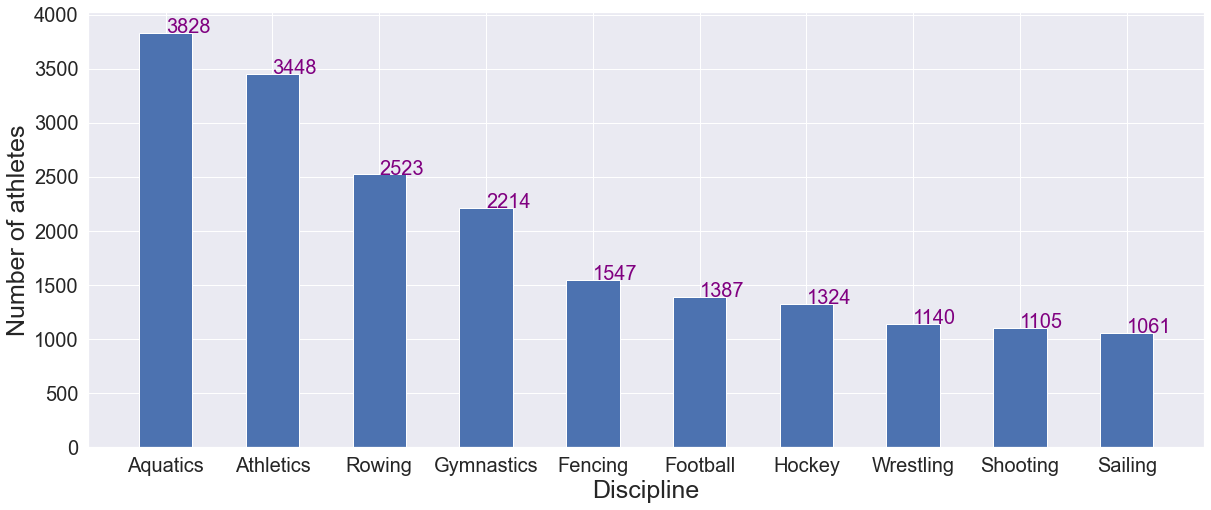

In [9]:
#plot number of athletes across sports
y = data['Sport'].value_counts().values[0:10]
x = data['Sport'].value_counts().index[0:10]
plt.figure(figsize=(20,8))
plt.bar(x,y,width=0.5)
for index, value in enumerate(y):
    plt.text(index, value, str(value),color='purple',size=20)
plt.xlabel('Discipline', size = 25)
plt.ylabel('Number of athletes', size = 25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [10]:
data['NOC'].value_counts().head()

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
Name: NOC, dtype: int64

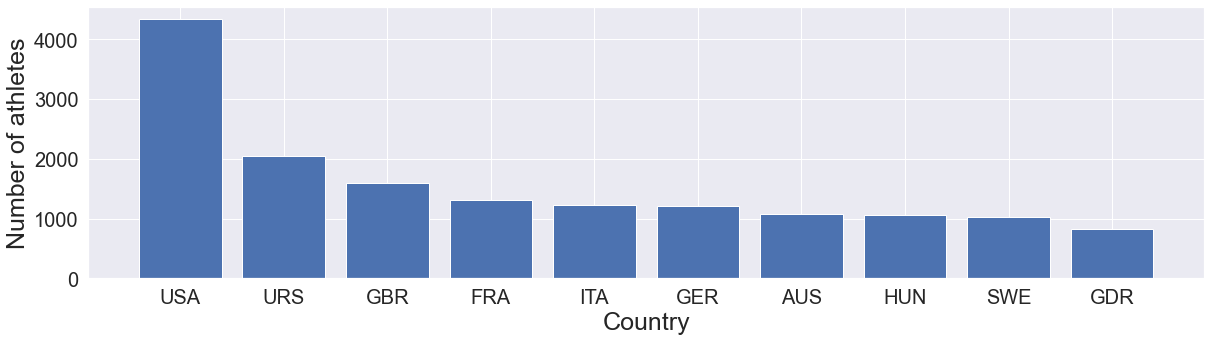

In [11]:
#plotting number of athletes across countries, taking first 10 countries with the most athletes
y = data['NOC'].value_counts().values[0:10]
x = data['NOC'].value_counts().index[0:10]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.xlabel('Country', size = 25)
plt.ylabel('Number of athletes', size = 25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

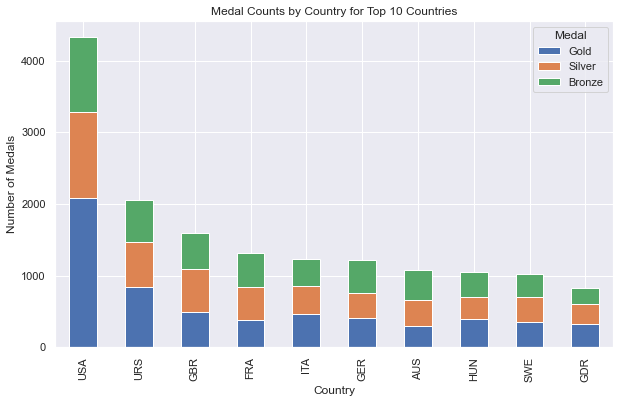

In [12]:
# Group the data by country and medal type, and sum the number of medals for each combination
medals_by_country = data.groupby(['NOC', 'Medal'])['Medal'].count().unstack()

# Calculate the total number of medals for each country by summing across medal types
medals_by_country['Total'] = medals_by_country.sum(axis=1)

# Sort the dataframe by the total number of medals for each country, and select the top 10
top_10 = medals_by_country.sort_values('Total', ascending=False).head(10)

# Create a stacked bar plot of the medal counts for the top 10 countries
ax = top_10[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the axis labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Number of Medals')
ax.set_title('Medal Counts by Country for Top 10 Countries')

# Show the plot
plt.show()

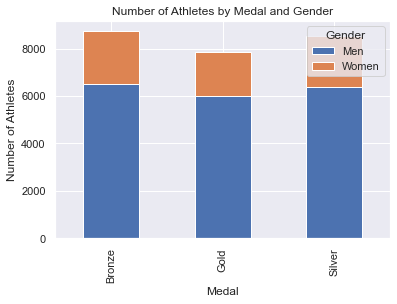

In [13]:
# Create a new DataFrame with columns "Medal", "Gender", and "Athlete"
df2 = data[["Medal", "Gender", "Athlete"]]

# Group the data by "Medal" and "Gender" and count the number of unique athletes in each group
df2 = df2.groupby(["Medal", "Gender"]).nunique()["Athlete"]

# Unstack the data to create a new DataFrame with "Gender" as the columns and "Medal" as the index
df2 = df2.unstack()

# Plot a stacked bar chart of this new DataFrame
df2.plot(kind="bar", stacked=True)
plt.xlabel("Medal")
plt.ylabel("Number of Athletes")
plt.title("Number of Athletes by Medal and Gender")
plt.show()